<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/Correlations_Tungkub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
#Reading dataset dalam format data Excel
df = pd.read_excel('/content/Tungkub_Hourly_PM_New.xlsx')
df = df.drop(0)
df = df.drop(1)
df.head()

,Date,Year,DOY,Time,T,RH,U,Rs,Dec,dr,...,ρ Cp,ra,G,rc,LE,LE.1,ET,Unnamed: 28,Unnamed: 29,Unnamed: 30
2,2023-02-13 12:00:02,2023,44,12,29.312,70.219,1,438.1,-0.23786,1.023978,...,1260.465453,193.254701,33.560402,69,247.741287,0.891869,0.364028,h,0.12,m
3,2023-02-13 13:00:02,2023,44,13,29.676,69.697,1.67,375.6,-0.23786,1.023978,...,1256.371338,115.721378,28.75582,69,221.961341,0.799061,0.326147,rc day,69.00,s/m
4,2023-02-13 14:00:02,2023,44,14,28.11,78.695,1.34,323.1,-0.23786,1.023978,...,1252.723978,144.219926,24.783312,69,179.529946,0.646308,0.263799,rc night,690.00,s/m
5,2023-02-13 15:00:02,2023,44,15,26.588,76.712,1,214.4,-0.23786,1.023978,...,1245.78727,193.254701,16.314088,69,121.028726,0.435703,0.177838,Latitude,-8.00,degrees
6,2023-02-13 16:00:02,2023,44,16,27.767,76.011,0.67,210.6,-0.23786,1.023978,...,1242.785238,288.439852,16.06366,69,119.201398,0.429125,0.175153,Longitude,115.00,degrees


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   object 
 5   RH           5561 non-null   object 
 6   U            5561 non-null   object 
 7   Rs           5561 non-null   object 
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [4]:
#Mengubah Tipe data menjadi Float
df[['Rs', 'RH', 'U', 'T', 'ET']] = df[['Rs', 'RH', 'U', 'T', 'ET']].astype(float)
#Deskripsi statistik dari parameter cuaca dan ET
df[['Rs', 'RH', 'U', 'T', 'ET']].describe()


,Rs,RH,U,T,ET
count,5561.000000,5561.000000,5561.000000,5561.000000,5561.000000
mean,193.424510,81.053563,0.400599,26.378555,0.155387
std,303.738622,12.268428,0.285843,3.545059,0.246353
min,0.600000,39.576000,0.200000,19.124000,-0.009454
25%,0.600000,70.335000,0.200000,23.671000,0.000704
50%,4.400000,85.489000,0.330000,25.665000,0.004404
75%,265.600000,91.156000,0.670000,29.269000,0.212025
max,1276.900000,99.261000,2.670000,35.789000,1.022930


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5561 entries, 2 to 5562
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5561 non-null   object 
 1   Year         5561 non-null   object 
 2   DOY          5561 non-null   object 
 3   Time         5561 non-null   object 
 4   T            5561 non-null   float64
 5   RH           5561 non-null   float64
 6   U            5561 non-null   float64
 7   Rs           5561 non-null   float64
 8   Dec          5561 non-null   object 
 9   dr           5561 non-null   object 
 10  t.c.         5561 non-null   object 
 11  angh         5561 non-null   object 
 12  cos θ        5561 non-null   object 
 13  Rs pot       5561 non-null   object 
 14  TRA          5561 non-null   float64
 15  Rb           5561 non-null   object 
 16  es           5561 non-null   object 
 17  e            5561 non-null   object 
 18  VPD          5561 non-null   object 
 19  Rn    

In [9]:
correlation_Rs = df['Rs'].corr(df['ET'])

print('Korelasi Radiasi Matahari dan Evapotranspirasi :', correlation_Rs)

Korelasi Radiasi Matahari dan Evapotranspirasi : 0.999310933793838


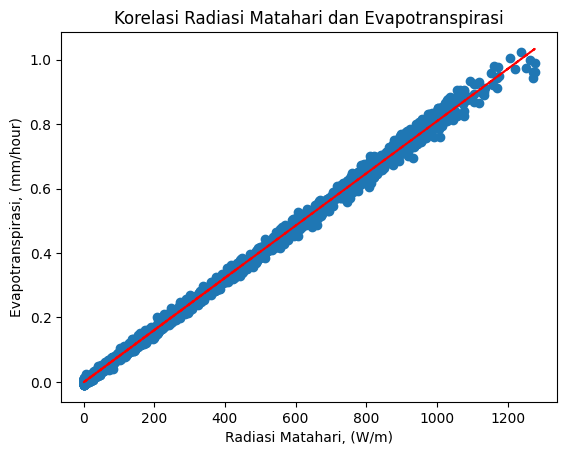

In [18]:
import matplotlib.pyplot as plt

#Scatter Plot
plt.scatter(df['Rs'], df['ET'])

#Menambah garis linear regresi
x = df['Rs']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('Radiasi Matahari, (W/m)')
plt.ylabel('Evapotranspirasi, (mm/hour)')
plt.title('Korelasi Radiasi Matahari dan Evapotranspirasi')

plt.show()

Korelasi Suhu Udara dan Evapotranspirasi : 0.776590706650661


Text(0.5, 1.0, 'Korelasi Suhu Udara dan Evapotranspirasi')

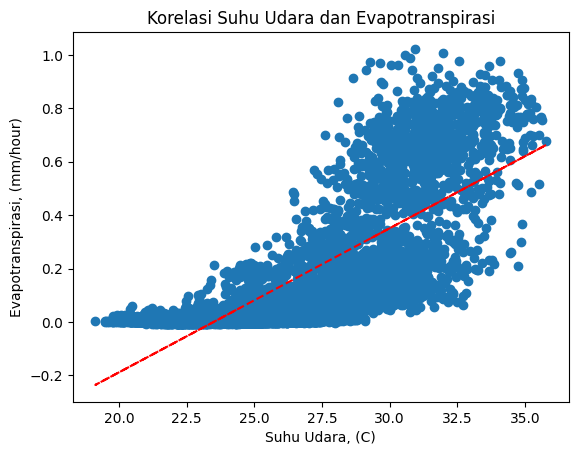

In [26]:
#Suhu Udara (T) VS ET
correlation_T = df['T'].corr(df['ET'])

print('Korelasi Suhu Udara dan Evapotranspirasi :', correlation_T)

#Scatter Plot
plt.scatter(df['T'], df['ET'])

#Menambah garis linear regresi
x = df['T']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('Suhu Udara, (C)')
plt.ylabel('Evapotranspirasi, (mm/hour)')
plt.title('Korelasi Suhu Udara dan Evapotranspirasi')

Korelasi Suhu Udara dan Evapotranspirasi : -0.779155123611456


Text(0.5, 1.0, 'Korelasi Kelembaban Udara dan Evapotranspirasi')

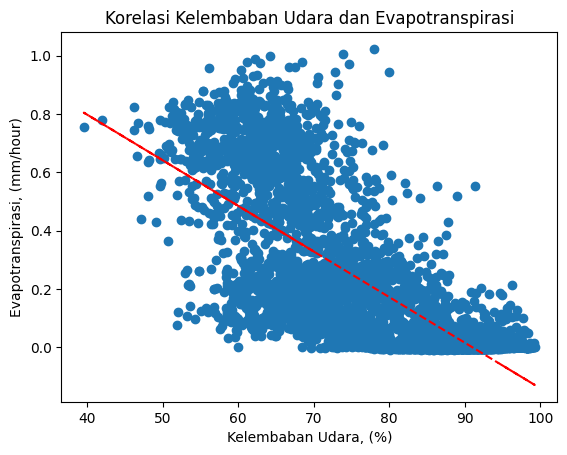

In [28]:
#Kelembaban Udara (RH) VS ET
correlation_RH = df['RH'].corr(df['ET'])

print('Korelasi Suhu Udara dan Evapotranspirasi :', correlation_RH)

#Scatter Plot
plt.scatter(df['RH'], df['ET'])

#Menambah garis linear regresi
x = df['RH']
y = df['ET']
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x), "r--")

#Label dan Judul
plt.xlabel('Kelembaban Udara, (%)')
plt.ylabel('Evapotranspirasi, (mm/hour)')
plt.title('Korelasi Kelembaban Udara dan Evapotranspirasi')